In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Imports: pip install -r requirements.txt
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
import numpy as np

In [2]:
sizeBoard = 5

In [3]:
# Get the values & pieces from the TetraVex game
# Values are for visualization
# Pieces are for the algorithm
def getValuesAndPieces(file):
    north = []
    east = []
    south = []
    west = []
    pieces = {}
    i = 0
    for line in file:
        sides = line.split(" ")
        pieces[i] = [int(sides[0]), int(sides[1]), int(sides[2]), int(sides[3])]
        i += 1
        north.append([int(sides[0])])
        east.append([int(sides[1])])
        south.append([int(sides[2])])
        west.append([int(sides[3])])

    values = [north, east, south, west]
    print("values: " + str(values))
    print("pieces: " + str(pieces))
    return values, pieces

In [4]:
def visualizeBoard(values, sizeBoard):
    xv, yv = np.meshgrid(np.arange(-0.5, sizeBoard), np.arange(-0.5, sizeBoard))  # vertices of the little squares
    xc, yc = np.meshgrid(np.arange(0, sizeBoard), np.arange(0, sizeBoard))  # centers of the little squares
    x = np.concatenate([xv.ravel(), xc.ravel()])
    y = np.concatenate([yv.ravel(), yc.ravel()])
    cstart = (sizeBoard + 1) * (sizeBoard + 1)  # indices of the centers

    trianglesN = [(i + j * (sizeBoard + 1), i + 1 + j * (sizeBoard + 1), cstart + i + j * sizeBoard)
                    for j in range(sizeBoard) for i in range(sizeBoard)]
    trianglesE = [(i + 1 + j * (sizeBoard + 1), i + 1 + (j + 1) * (sizeBoard + 1), cstart + i + j * sizeBoard)
                    for j in range(sizeBoard) for i in range(sizeBoard)]
    trianglesS = [(i + 1 + (j + 1) * (sizeBoard + 1), i + (j + 1) * (sizeBoard + 1), cstart + i + j * sizeBoard)
                    for j in range(sizeBoard) for i in range(sizeBoard)]
    trianglesW = [(i + (j + 1) * (sizeBoard + 1), i + j * (sizeBoard + 1), cstart + i + j * sizeBoard)
                    for j in range(sizeBoard) for i in range(sizeBoard)]
    triangul = [Triangulation(x, y, triangles) for triangles in [trianglesN, trianglesE, trianglesS, trianglesW]]

    cmaps = 'tab10' # Color map based out of 10 colors
    fig, ax = plt.subplots()
    imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmaps, vmin=0, vmax=9, ec='white')
                for t, val in zip(triangul, values)]

    # TODO Add text (nog te fixen)
    # for val, dir in zip(values, [(-1, 0), (0, 1), (1, 0), (0, -1)]):
    #     for i in range(M):
    #         for j in range(N):
    #             v = val[j, i]
    #             ax.text(i + 0.3 * dir[1], j + 0.3 * dir[0], f'{v:.2f}', color='k' if 0.2 < v < 0.8 else 'w', ha='center', va='center')
    # cbar = fig.colorbar(imgs[0], ax=ax)

    ax.set_xticks(range(sizeBoard))
    ax.set_yticks(range(sizeBoard))
    ax.invert_yaxis()
    ax.margins(x=0, y=0)
    ax.set_aspect('equal', 'box')  # square cells
    plt.tight_layout()
    plt.show()

values: [[[3], [6], [4], [8], [1], [3], [2], [3], [6], [0], [6], [4], [7], [9], [8], [3], [3], [9], [8], [3], [7], [9], [9], [9], [7]], [[1], [9], [8], [1], [0], [0], [2], [7], [5], [6], [9], [4], [9], [7], [1], [5], [5], [8], [0], [0], [4], [3], [7], [5], [5]], [[3], [2], [3], [6], [0], [6], [4], [7], [9], [8], [3], [3], [9], [8], [3], [7], [9], [9], [9], [7], [2], [0], [6], [3], [5]], [[6], [1], [9], [8], [1], [5], [0], [2], [7], [5], [9], [9], [4], [9], [7], [8], [5], [5], [8], [0], [9], [4], [3], [7], [5]]]
pieces: {0: [3, 1, 3, 6], 1: [6, 9, 2, 1], 2: [4, 8, 3, 9], 3: [8, 1, 6, 8], 4: [1, 0, 0, 1], 5: [3, 0, 6, 5], 6: [2, 2, 4, 0], 7: [3, 7, 7, 2], 8: [6, 5, 9, 7], 9: [0, 6, 8, 5], 10: [6, 9, 3, 9], 11: [4, 4, 3, 9], 12: [7, 9, 9, 4], 13: [9, 7, 8, 9], 14: [8, 1, 3, 7], 15: [3, 5, 7, 8], 16: [3, 5, 9, 5], 17: [9, 8, 9, 5], 18: [8, 0, 9, 8], 19: [3, 0, 7, 0], 20: [7, 4, 2, 9], 21: [9, 3, 0, 4], 22: [9, 7, 6, 3], 23: [9, 5, 3, 7], 24: [7, 5, 5, 5]}


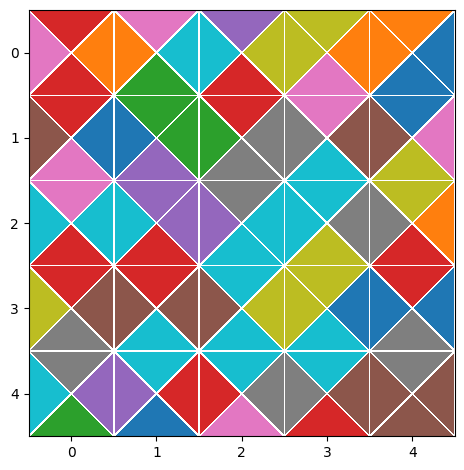

In [5]:
# Solution
file = open("./dataFiles/TetraVex_" + str(sizeBoard) + "x"  + str(sizeBoard) + "_Solution.txt", "r")
values, pieces = getValuesAndPieces(file)
visualizeBoard(values, sizeBoard)

values: [[[6], [9], [3], [2], [9], [3], [9], [6], [0], [1], [7], [9], [4], [3], [7], [8], [9], [4], [3], [6], [7], [8], [3], [3], [8]], [[5], [7], [0], [2], [8], [5], [7], [9], [6], [0], [4], [3], [8], [7], [5], [0], [5], [4], [0], [9], [9], [1], [5], [1], [1]], [[9], [6], [6], [4], [9], [9], [8], [3], [8], [0], [2], [0], [3], [7], [5], [9], [3], [3], [7], [2], [9], [3], [7], [3], [6]], [[7], [3], [5], [0], [5], [5], [9], [9], [5], [1], [9], [4], [9], [2], [5], [8], [7], [9], [0], [1], [4], [7], [8], [6], [8]]]
pieces: {0: [6, 5, 9, 7], 1: [9, 7, 6, 3], 2: [3, 0, 6, 5], 3: [2, 2, 4, 0], 4: [9, 8, 9, 5], 5: [3, 5, 9, 5], 6: [9, 7, 8, 9], 7: [6, 9, 3, 9], 8: [0, 6, 8, 5], 9: [1, 0, 0, 1], 10: [7, 4, 2, 9], 11: [9, 3, 0, 4], 12: [4, 8, 3, 9], 13: [3, 7, 7, 2], 14: [7, 5, 5, 5], 15: [8, 0, 9, 8], 16: [9, 5, 3, 7], 17: [4, 4, 3, 9], 18: [3, 0, 7, 0], 19: [6, 9, 2, 1], 20: [7, 9, 9, 4], 21: [8, 1, 3, 7], 22: [3, 5, 7, 8], 23: [3, 1, 3, 6], 24: [8, 1, 6, 8]}


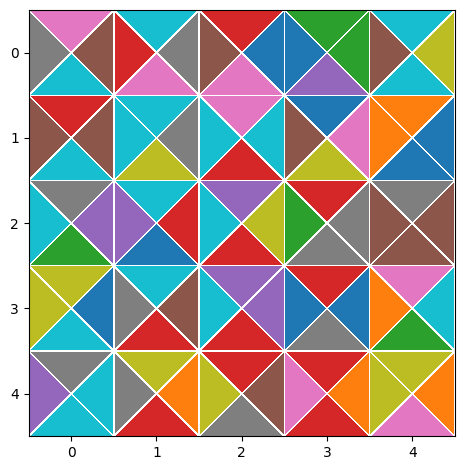

In [6]:
# Start board
file = open("./dataFiles/TetraVex_" + str(sizeBoard) + "x"  + str(sizeBoard) + ".txt", "r")
values, pieces = getValuesAndPieces(file)
visualizeBoard(values, sizeBoard)

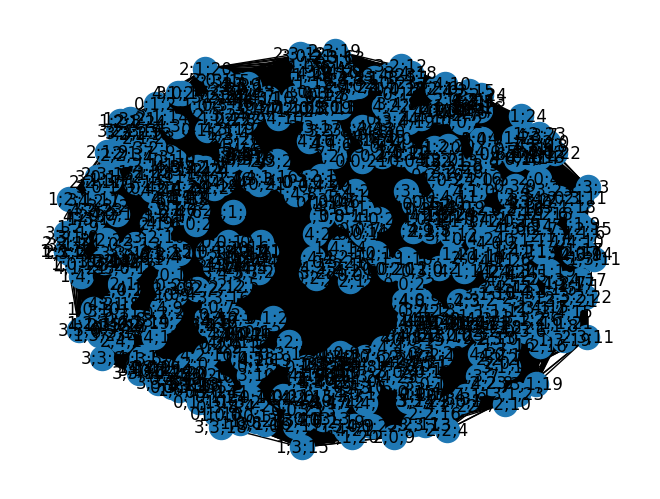

Graph: 625 nodes, 159220 edges


In [7]:
# Build Graph
size = len(pieces)
graph = {}
for piece1, colors1 in pieces.items():
    for row1 in range(sizeBoard):
        for col1 in range(sizeBoard):
            for piece2, colors2 in pieces.items():
                if piece1 == piece2:
                        continue
                for row2 in range(sizeBoard):
                    for col2 in range(sizeBoard): 
                        if row1 == row2 and col1 == col2:
                            continue
                        node1 = (row1, col1, piece1)
                        node2 = (row2, col2, piece2)

                        graph.setdefault(node1, []).append(node2)

                        if row1-1 == row2 and col1 == col2 \
                            and colors1[0] != colors2[2]:
                                graph[node1].remove(node2)

                        if row1 == row2-1 and col1 == col2 \
                            and colors1[2] != colors2[0]:
                                graph[node1].remove(node2)

                        if row1 == row2 and col1-1 == col2 \
                            and colors1[3] != colors2[1]:
                                graph[node1].remove(node2)   

                        if row1 == row2 and col1 == col2-1 \
                            and colors1[1] != colors2[3]:
                                graph[node1].remove(node2) 

# for node, edges in graph.items():
#     print(str(node) + ": " + str(edges))

G = nx.Graph()
for node, edges in graph.items():
    for edge in edges:
        nodeStr = str(node[0]) + ";" + str(node[1]) + ";" + str(node[2])
        edgeStr = str(edge[0]) + ";" + str(edge[1]) + ";" + str(edge[2])
        G.add_edge(nodeStr, edgeStr)
nx.draw(G, with_labels = True)
plt.show()

print("Graph: " + str(G.number_of_nodes()) + " nodes, " + str(G.number_of_edges()) + " edges")

In [8]:
def is_clique(graph, current_clique):
  for node1 in current_clique:
    for node2 in current_clique:
      if node1 == node2:
        continue     

      if node1 not in list(G[node2]) or node2 not in list(G[node1]):
        return False
  return True

def maxCliqueAlgo(graph, nodes, current_clique, max_clique):
  if len(max_clique) == len(pieces):
    return  # No need to continue if the current clique has the size of #pieces

  if len(current_clique) > len(max_clique):
    max_clique.clear()
    max_clique.update(current_clique)
  
  for node in nodes.copy():
    nodes.remove(node)
    current_clique.add(node)
    if is_clique(graph, current_clique):
      maxCliqueAlgo(graph.copy(), nodes.copy(), current_clique.copy(), max_clique)
    current_clique.remove(node)
    nodes.add(node)

In [9]:
def visualizeSolution(max_clique_solution):
    north = [0] * (sizeBoard * sizeBoard)
    east = [0] * (sizeBoard * sizeBoard)
    south = [0] * (sizeBoard * sizeBoard)
    west = [0] * (sizeBoard * sizeBoard)

    for node in max_clique_solution:
        node = str(node).split(";")
        for i in range(0, len(node)):
            node[i] = int(node[i])

        row = node[0] 
        column = node[1]
        boardPiece = node[2]

        north[column + row*sizeBoard] = pieces.get(boardPiece)[0]
        east[column + row*sizeBoard] = pieces.get(boardPiece)[1]
        south[column + row*sizeBoard] = pieces.get(boardPiece)[2]
        west[column + row*sizeBoard] = pieces.get(boardPiece)[3]
           
    values = [north, east, south, west]
    visualizeBoard(values, sizeBoard)

Max clique - NX: 
{'3;4;24', '3;0;22', '1;3;5', '0;1;2', '4;1;10', '1;0;1', '4;3;11', '3;2;9', '0;2;3', '2;4;8', '1;1;0', '0;4;4', '2;3;16', '2;1;6', '2;0;7'}


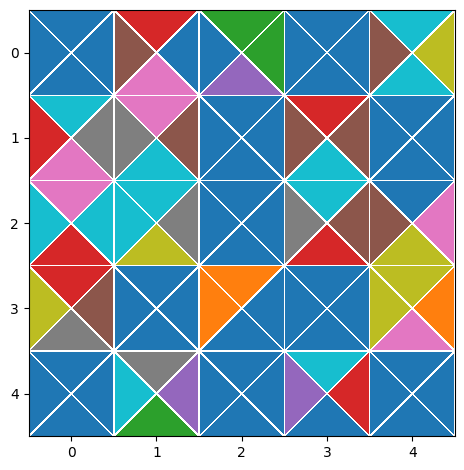

In [16]:
# TRAAG
# nodes = set(G.nodes())
# current_clique = set()
# max_clique_algo = set()
# maxCliqueAlgo(graph, nodes, current_clique, max_clique_algo)
# print("Max clique - Algo: ")
# print(max_clique_algo)
# print()
# visualizeSolution(max_clique_algo)

# Networkx - Max Clique - Vaak niet juist antwoord
nx_max_clique = nx.approximation.max_clique(G)
print("Max clique - NX: ")
print(nx_max_clique)
visualizeSolution(nx_max_clique)


# # Networkx - All Cliques Iterative
# res = nx.find_cliques(G)
# cliques = [item for item in res]
# cliques = sorted(cliques, key=lambda item: -len(item))
# print("Cliques Iterative - NX: ")
# for item in cliques:
#     if(len(item) == sizeBoard*sizeBoard):
#         print(item)
#         visualizeSolution(item)
#         break

# print()

# # Networkx - All Cliques Recursive
# res = nx.find_cliques_recursive(G)
# cliques = [item for item in res]
# cliques = sorted(cliques, key=lambda item: -len(item))
# print("Cliques Recursive - NX: ")
# for item in cliques:
#     if(len(item) == sizeBoard*sizeBoard):
#         print(item)
#         visualizeSolution(item)
#         break
